<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/main/LightGBMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
from google.colab import drive
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
!pip install scikit-learn==1.4.1.post1
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta
import numpy as np
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.1 MB/s eta 0:00:00


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Mounting the Google Drive
drive.mount('/content/drive')

training_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/training_dataset.xlsx')
retraining_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/retraining_dataset.xlsx')
sept_testing_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/sept_train_test.xlsx')

Mounted at /content/drive


In [ ]:
features  = ['Encoded Code', 'Encoded Department', 'YearsWorked', 'DayOfWeek',
             'LeaveMonth', 'LeaveYear', 'Encoded Reason','Encoded Status',
             'Encoded Absenteeism Type', 'Encoded Shift', 'MonthlyDeptTotal']

In [ ]:
retraining_df.shape

(85090, 24)

In [ ]:
training_df.shape

(83236, 24)

In [ ]:
training_df.head()

,Unnamed: 0,Date,Shift,Code,Department,Absenteeism Type,Status,Leave Type,Reason,Joined Date,Encoded Code,YearsWorked,DayOfWeek,LeaveMonth,LeaveYear,MainDepartment,Encoded Department,Encoded Reason,Encoded Status,Encoded Absenteeism Type,Encoded Shift,MonthlyDeptTotal,LeavesNextMonth,TargetCategory
0,0,2021-12-01,Shift A,AA369,Team - MAT 4A - BD,Informed,Notified,1.0,Maternity,2015-09-11,369,6,3,12,2021,MAT,1,10,1,0,1,127,0,A
1,1,2021-12-01,Shift A,AA362,Team - MAT 4A - BD,Informed,Notified,1.0,Maternity,2018-11-14,362,3,3,12,2021,MAT,1,10,1,0,1,127,24,B
2,2,2021-12-01,Shift A,AA359,Team - MAT 4A - BD,Informed,Notified,1.0,Maternity,2019-10-09,359,2,3,12,2021,MAT,1,10,1,0,1,127,16,B
3,3,2021-12-01,Shift A,AA541,Team - MAT 4A - BD,Informed,Notified,1.0,Maternity,2020-10-02,541,1,3,12,2021,MAT,1,10,1,0,1,127,2,A
4,4,2021-12-01,Shift A,AA398,Team - MAT 3A - BD,Informed,Notified,1.0,Maternity,2008-02-29,398,13,3,12,2021,MAT,1,10,1,0,1,127,1,A


In [ ]:
X_train = training_df[features]
Y_train = training_df['TargetCategory']

In [ ]:
X_retrain = retraining_df[features]
Y_retrain = retraining_df['TargetCategory']

In [ ]:
X_test = sept_testing_df[features]
Y_test = sept_testing_df['TargetCategory']

##Imbalanced Learning

In [ ]:
Y_train_counts = training_df['TargetCategory'].value_counts()
print(Y_train_counts)

TargetCategory
A    45642
B    37594
Name: count, dtype: int64


##Hyper-Parameter Tuning

In [ ]:
!pip show lightgbm

In [30]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification


# Define the LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Define the parameter grid for grid search
param_grid = {
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
}

# Define grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Perform grid search
grid_search.fit(X_retrain, Y_retrain)

# Print the best parameters found
print("Best parameters found:", grid_search.best_params_)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Info] Number of positive: 30534, number of negative: 37538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 68072, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448554 -> initscore=-0.206513
[LightGBM] [Info] Start training from score -0.206513
[LightGBM] [Warning] Unknown parameter: max_dept
[CV] END learning_rate=0.05, max_dept=10, n_estimators=100, num_leaves=20; total time=   0.8s
[LightGBM] [Warning] Unknown parameter: max_dept
[LightGBM] [Warning] Found whitespace in feature_names, replace with un

#Model Training

In [37]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Define and train the LightGBM model with proper parameters
model_LGBM = LGBMClassifier(num_leaves=30, learning_rate=0.2, n_estimators = 200, metric='logloss')
model_LGBM.fit(X_train, Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 37594, number of negative: 45642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 83236, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.451656 -> initscore=-0.193984
[LightGBM] [Info] Start training from score -0.193984


LGBMClassifier(learning_rate=0.2, metric='logloss', n_estimators=200,
               num_leaves=30)

In [44]:
import pickle
# Save the model
with open('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Models/LightGBM_model_original.pkl', 'wb') as file:
    pickle.dump(model_LGBM, file)

In [38]:
model_LGBM.fit(X_retrain, Y_retrain)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 38167, number of negative: 46923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 85090, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448549 -> initscore=-0.206537
[LightGBM] [Info] Start training from score -0.206537


LGBMClassifier(learning_rate=0.2, metric='logloss', n_estimators=200,
               num_leaves=30)

#Training Accuracy

In [39]:
test_pred = model_LGBM.predict(X_retrain)


from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(Y_retrain, test_pred)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.88      0.92      0.90     46923
           B       0.90      0.85      0.88     38167

    accuracy                           0.89     85090
   macro avg       0.89      0.89      0.89     85090
weighted avg       0.89      0.89      0.89     85090



#Testing dataset

In [40]:
predictions_LGBM = model_LGBM.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

results_df = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions_LGBM})
accuracy = accuracy_score(Y_test, predictions_LGBM)
accuracy = "{:.3f}".format(accuracy)


print("Actual values and predictions:")
print(results_df)
print("\n\nAccuracy of Predicted Classes:", accuracy)

Actual values and predictions:
     Actual Predicted
0         A         A
1         B         B
2         B         B
3         B         B
4         B         B
...     ...       ...
2312      B         A
2313      A         A
2314      A         A
2315      A         A
2316      B         A

[2317 rows x 2 columns]


Accuracy of Predicted Classes: 0.807


In [42]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(Y_test, predictions_LGBM)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.80      0.92      0.86      1439
           B       0.82      0.63      0.71       878

    accuracy                           0.81      2317
   macro avg       0.81      0.77      0.78      2317
weighted avg       0.81      0.81      0.80      2317



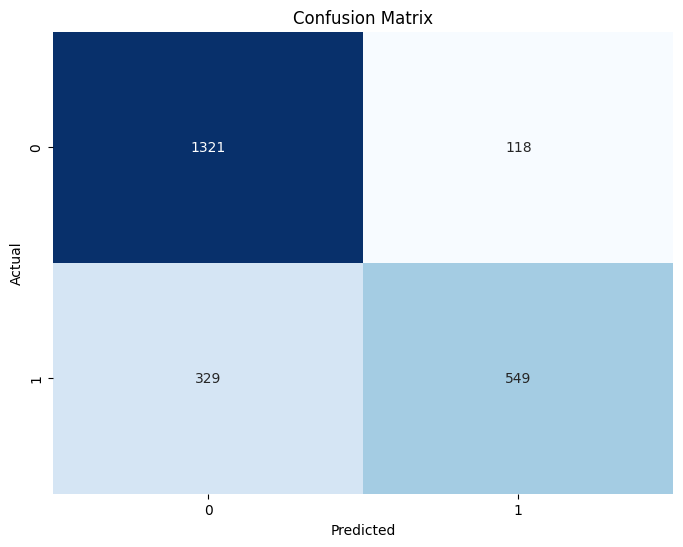

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, predictions_LGBM)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()